In [102]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import re
import shutil
import string

from tensorflow.keras import layers
from tensorflow.keras import losses
print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.4.0-rc0


# Quickstart - MNIST

In [19]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [21]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.56494296,  0.74612594, -0.8051199 ,  0.7702265 , -0.27325884,
         0.04611246, -0.45173264,  0.7621027 , -0.17095612, -0.6040257 ]],
      dtype=float32)

In [22]:
tf.nn.softmax(predictions).numpy()

array([[0.14128686, 0.16935131, 0.03589972, 0.17348234, 0.06110481,
        0.08409624, 0.05111698, 0.17207873, 0.06768694, 0.04389602]],
      dtype=float32)

In [23]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [24]:
loss_fn(y_train[:1], predictions).numpy()

2.4757936

In [25]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-11-10 12:33:18.138511: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-10 12:33:18.145575: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 1s 494us/step - loss: 0.5193 - accuracy: 0.8457
Epoch 2/5
1875/1875 [==============================] - 1s 410us/step - loss: 0.1976 - accuracy: 0.9415
Epoch 3/5
1875/1875 [==============================] - 1s 420us/step - loss: 0.1463 - accuracy: 0.9564
Epoch 4/5
1875/1875 [==============================] - 1s 390us/step - loss: 0.1291 - accuracy: 0.96180s - loss: 0.1287 
Epoch 5/5
1875/1875 [==============================] - 1s 381us/step - loss: 0.1229 - accuracy: 0.9613


In [27]:
model.evaluate(x_test,  y_test, verbose=2)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 0s - loss: 0.1002 - accuracy: 0.9710


[0.10023342072963715, 0.9710000157356262]

In [28]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [29]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.41071486e-11, 7.66667785e-10, 1.39696374e-06, 7.51257176e-06,
        1.35931717e-11, 1.19536505e-08, 9.31251183e-17, 9.99990821e-01,
        4.51665869e-08, 2.52025245e-07],
       [1.06885473e-10, 9.05382112e-05, 9.99864221e-01, 3.70572634e-05,
        3.88284615e-16, 1.25499994e-07, 1.73884476e-10, 1.08223392e-14,
        7.95913456e-06, 4.53141027e-16],
       [5.59974778e-09, 9.99486327e-01, 1.22009806e-05, 1.11695344e-05,
        4.23730053e-05, 1.84977625e-06, 4.51677266e-07, 3.42235260e-04,
        1.01857840e-04, 1.39333395e-06],
       [9.99856353e-01, 8.20875867e-10, 4.79505252e-05, 8.46514254e-08,
        7.86354803e-08, 4.57295828e-05, 1.01789628e-05, 3.17865524e-05,
        1.25433161e-07, 7.66942958e-06],
       [7.98959454e-10, 8.66232364e-10, 2.46680173e-07, 8.54675331e-10,
        9.99047816e-01, 7.94804791e-08, 5.66967895e-09, 3.76070989e-06,
        1.12133819e-06, 9.47003544e-04]], dtype=float32)>

# Basic classification: Classify images of clothing

In [32]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [37]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

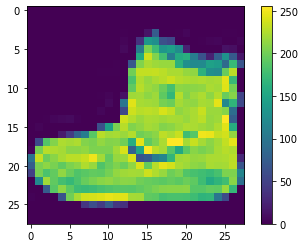

In [53]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [54]:
train_images = train_images / 255.0
test_images = test_images / 255.0

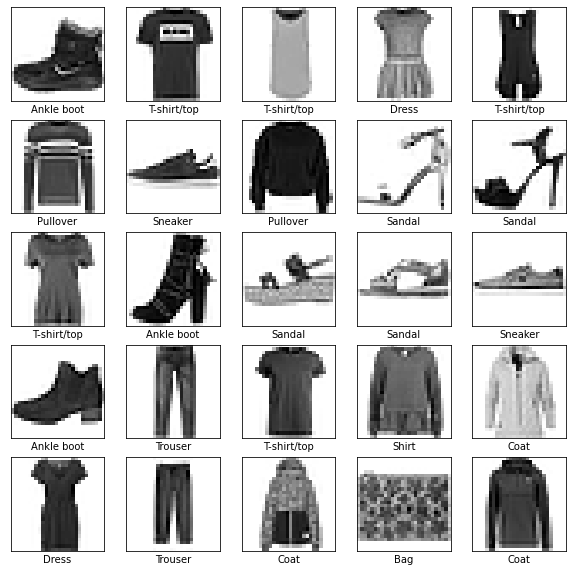

In [55]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [58]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [59]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 1s 393us/step - loss: 0.6261 - accuracy: 0.7827
Epoch 2/10
1875/1875 [==============================] - 1s 389us/step - loss: 0.3773 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 1s 382us/step - loss: 0.3406 - accuracy: 0.8754
Epoch 4/10
1875/1875 [==============================] 

In [60]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 0s - loss: 0.3533 - accuracy: 0.8757

Test accuracy: 0.8756999969482422


In [63]:
probability_model = tf.keras.Sequential([
    model, 
    tf.keras.layers.Softmax()
])

predictions = probability_model.predict(test_images)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [64]:
predictions[0]

array([1.5525740e-07, 5.1319873e-12, 1.0447109e-08, 3.1985485e-09,
       7.6704426e-10, 1.4288251e-03, 6.6115632e-07, 1.5509864e-02,
       2.7381373e-07, 9.8306018e-01], dtype=float32)

In [66]:
np.argmax(predictions[0])

9

In [68]:
test_labels[0]

9

In [69]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

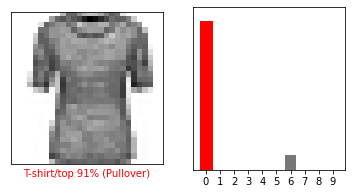

In [99]:
i = random.randint(0, test_images.shape[0])
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

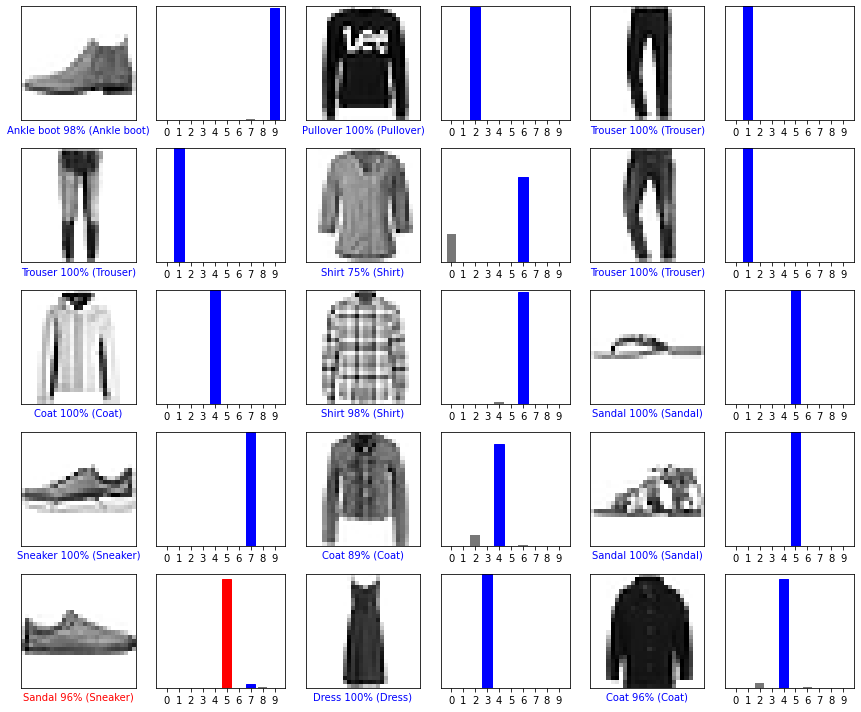

In [100]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Basic text classification

In [103]:
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'
dataset = tf.keras.utils.get_file(
    'aclImdb_v1', url,
    untar=True, cache_dir='.',
    cache_subdir=''
)
dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

84131840/84125825 [==============================] - 36s 0us/step


In [104]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['urls_unsup.txt',
 'neg',
 'urls_pos.txt',
 'unsup',
 'urls_neg.txt',
 'pos',
 'unsupBow.feat',
 'labeledBow.feat']

In [105]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [106]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)